<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Análisis de errores: Matrices de Jones/Mueller</font>
</div>

- **Para**: SLM Pluto

- **Fecha**: 2022/02/21
        
- **Autores**: Ángela Soria García

- **Objetivos**: Análisis de los errores en las matrices de Jones/Mueller en función de los ángulos de los polarizadores/retardadores

- **Descripción** Calculamos la variación de las matrices de Jones/Mueller cuando el ángulo de las ópticas varía unos pocos ángulos (+/- 2 grados)

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from py_pol.jones_matrix import Jones_matrix, create_Jones_matrices
from py_pol.jones_vector import Jones_vector, degrees
from py_pol.mueller import Mueller
from py_pol.stokes import Stokes

from py_lab.setups.slm_calibration import *
from error_analysis import *

number of processors: 2
total memory        : 4.0 Gb
available memory    : 31 %
max frequency       : 3000 GHz


In [3]:
num_gl = 256
phase_max=np.pi

In [4]:
sigma = 2*degrees

## Retardador lineal

In [5]:
gl = np.arange(0, num_gl, 1, dtype=int)
m00 = np.linspace(0.8, 1, num_gl)
m01 = np.linspace(0.1, 0.1, num_gl)
m10 = np.linspace(0.1, 0.1, num_gl)
m11 = np.linspace(0.8, 1, num_gl) * np.exp(1j * phase_max * gl / num_gl)

J = Jones_matrix(name='simulation')
J.from_components((m00, m01, m10, m11));

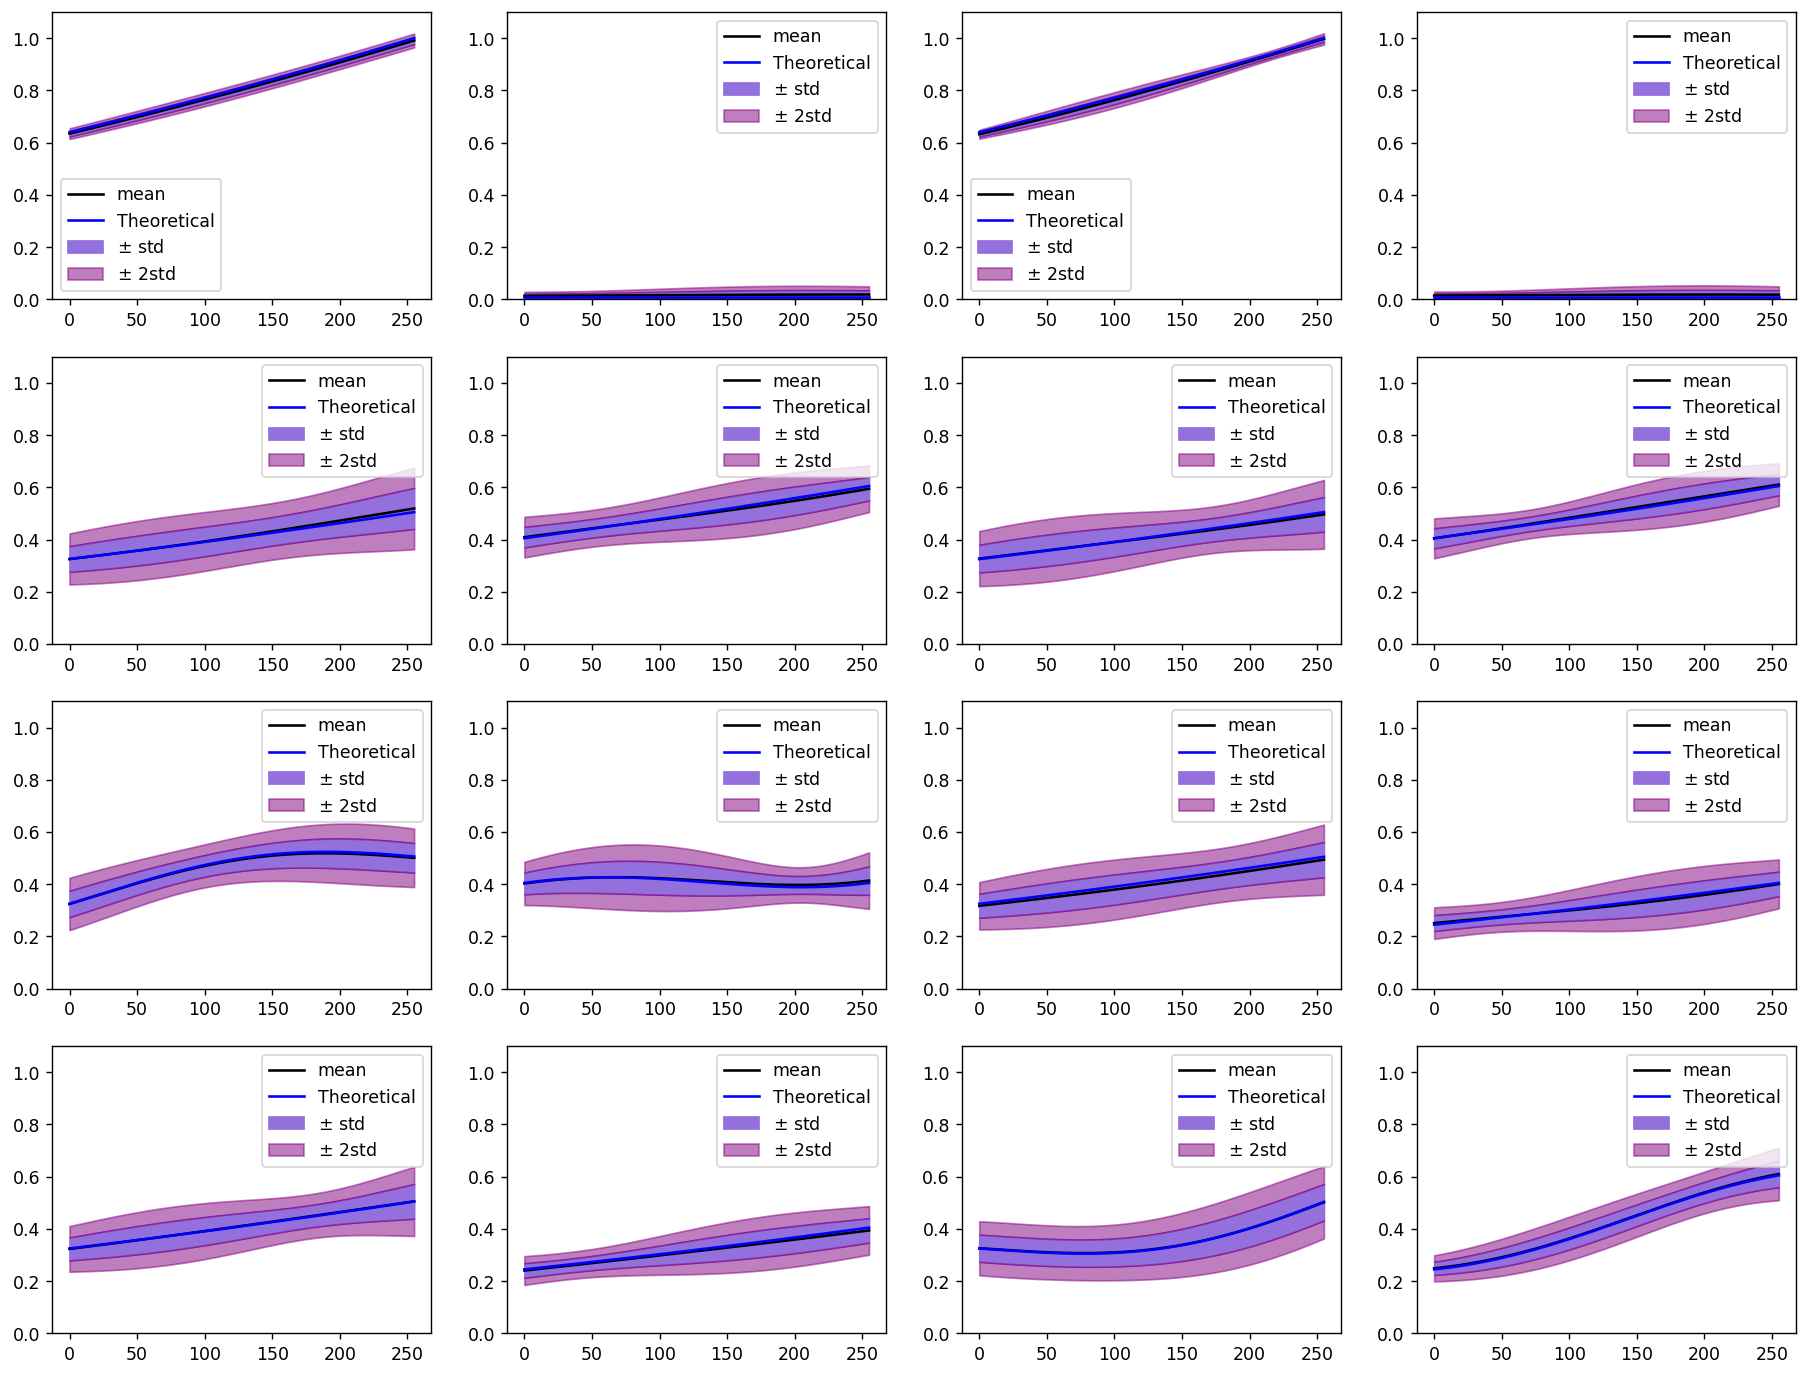

In [31]:
I,mean,std= errors(sigma=2*degrees,steps=50,J=J)

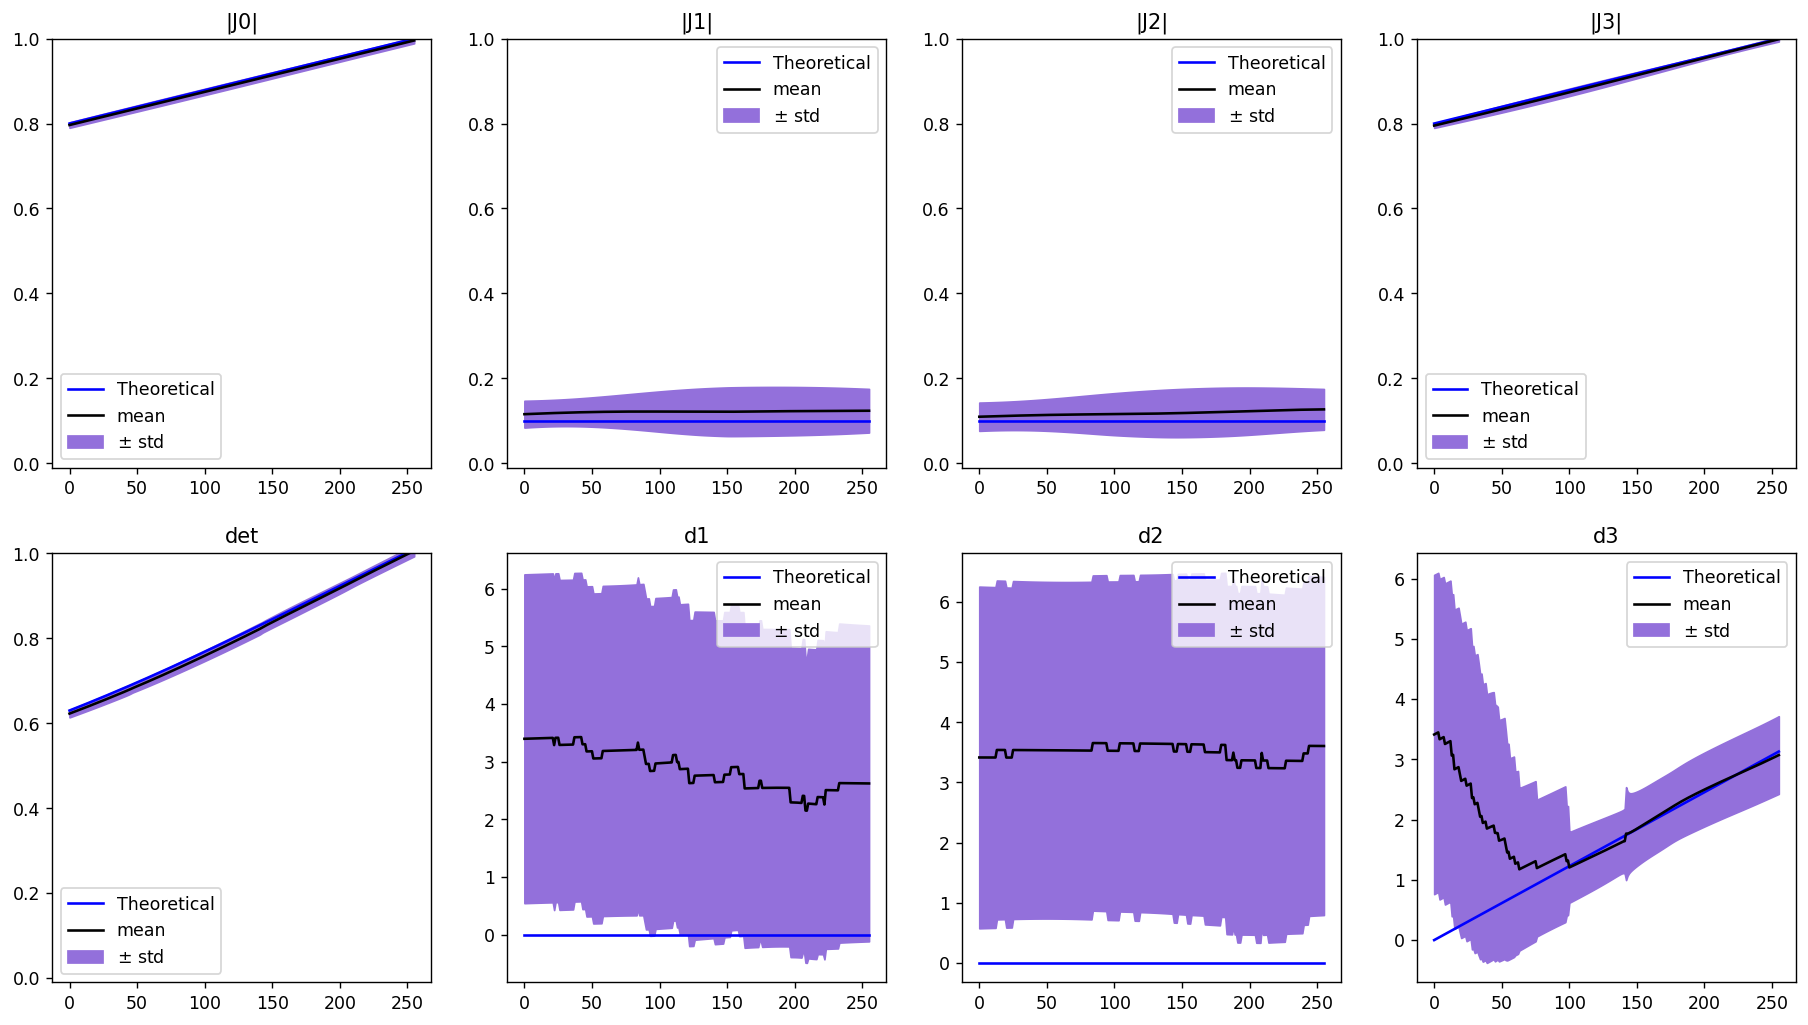

In [32]:
comp, mean_comp,std_comp = compare_Jones(I,J)

parameters_Jones(comp,J,compare=False)

In [35]:
I = check_all_intensities(comp,J)

# Test Intensities lineal retarder

In [151]:
R = np.linspace(0, phase_max, num_gl)
J = Jones_matrix().retarder_linear(R=R,azimuth=5*degrees)
#J = Jones_matrix().retarder_azimuth_ellipticity(R=R,ellipticity=25*degrees)
#J = Jones_matrix().diattenuator_retarder_azimuth_ellipticity(p1=1,p2=0.5,R=R)
#J = Jones_matrix().diattenuator_linear(p1=1, p2=1e-6, azimuth=R)

In [152]:
# num_gl = 256
# gl = np.arange(0, num_gl, 1, dtype=int)
# m00 = np.linspace(1, 1, num_gl)
# m01 = np.linspace(0, 0, num_gl)
# m10 = np.linspace(0.01, .010, num_gl)
# m11 = np.linspace(1, 1, num_gl) * np.exp(1j * phase_max * gl / num_gl)

# Jslm_simulation = Jones_matrix(name='simulation')
# Jslm_simulation.from_components((m00, m01, m10, m11));

In [153]:
"""
plt.figure(figsize=(18, 14))
levels = np.arange(0,256)
for ind in range(16):
        for ort in range(2):
            
            angles = Calculate_Angles(ind,ort,mirrors=[False,False],check_repeat=False,return_angles=True,add_zero=False)
            amp,phase = Calculate_Transmission(angles,J,E0=None)
            
            #if ort == 0:
            #plt.subplot(8,4,ind+1)
            plt.plot(levels,amp)
            plt.title('M = {}, O = {}'.format(ind,ort))
            plt.ylabel('Intensity (a.u)')
            plt.show()

"""

"\nplt.figure(figsize=(18, 14))\nlevels = np.arange(0,256)\nfor ind in range(16):\n        for ort in range(2):\n            \n            angles = Calculate_Angles(ind,ort,mirrors=[False,False],check_repeat=False,return_angles=True,add_zero=False)\n            amp,phase = Calculate_Transmission(angles,J,E0=None)\n            \n            #if ort == 0:\n            #plt.subplot(8,4,ind+1)\n            plt.plot(levels,amp)\n            plt.title('M = {}, O = {}'.format(ind,ort))\n            plt.ylabel('Intensity (a.u)')\n            plt.show()\n\n"

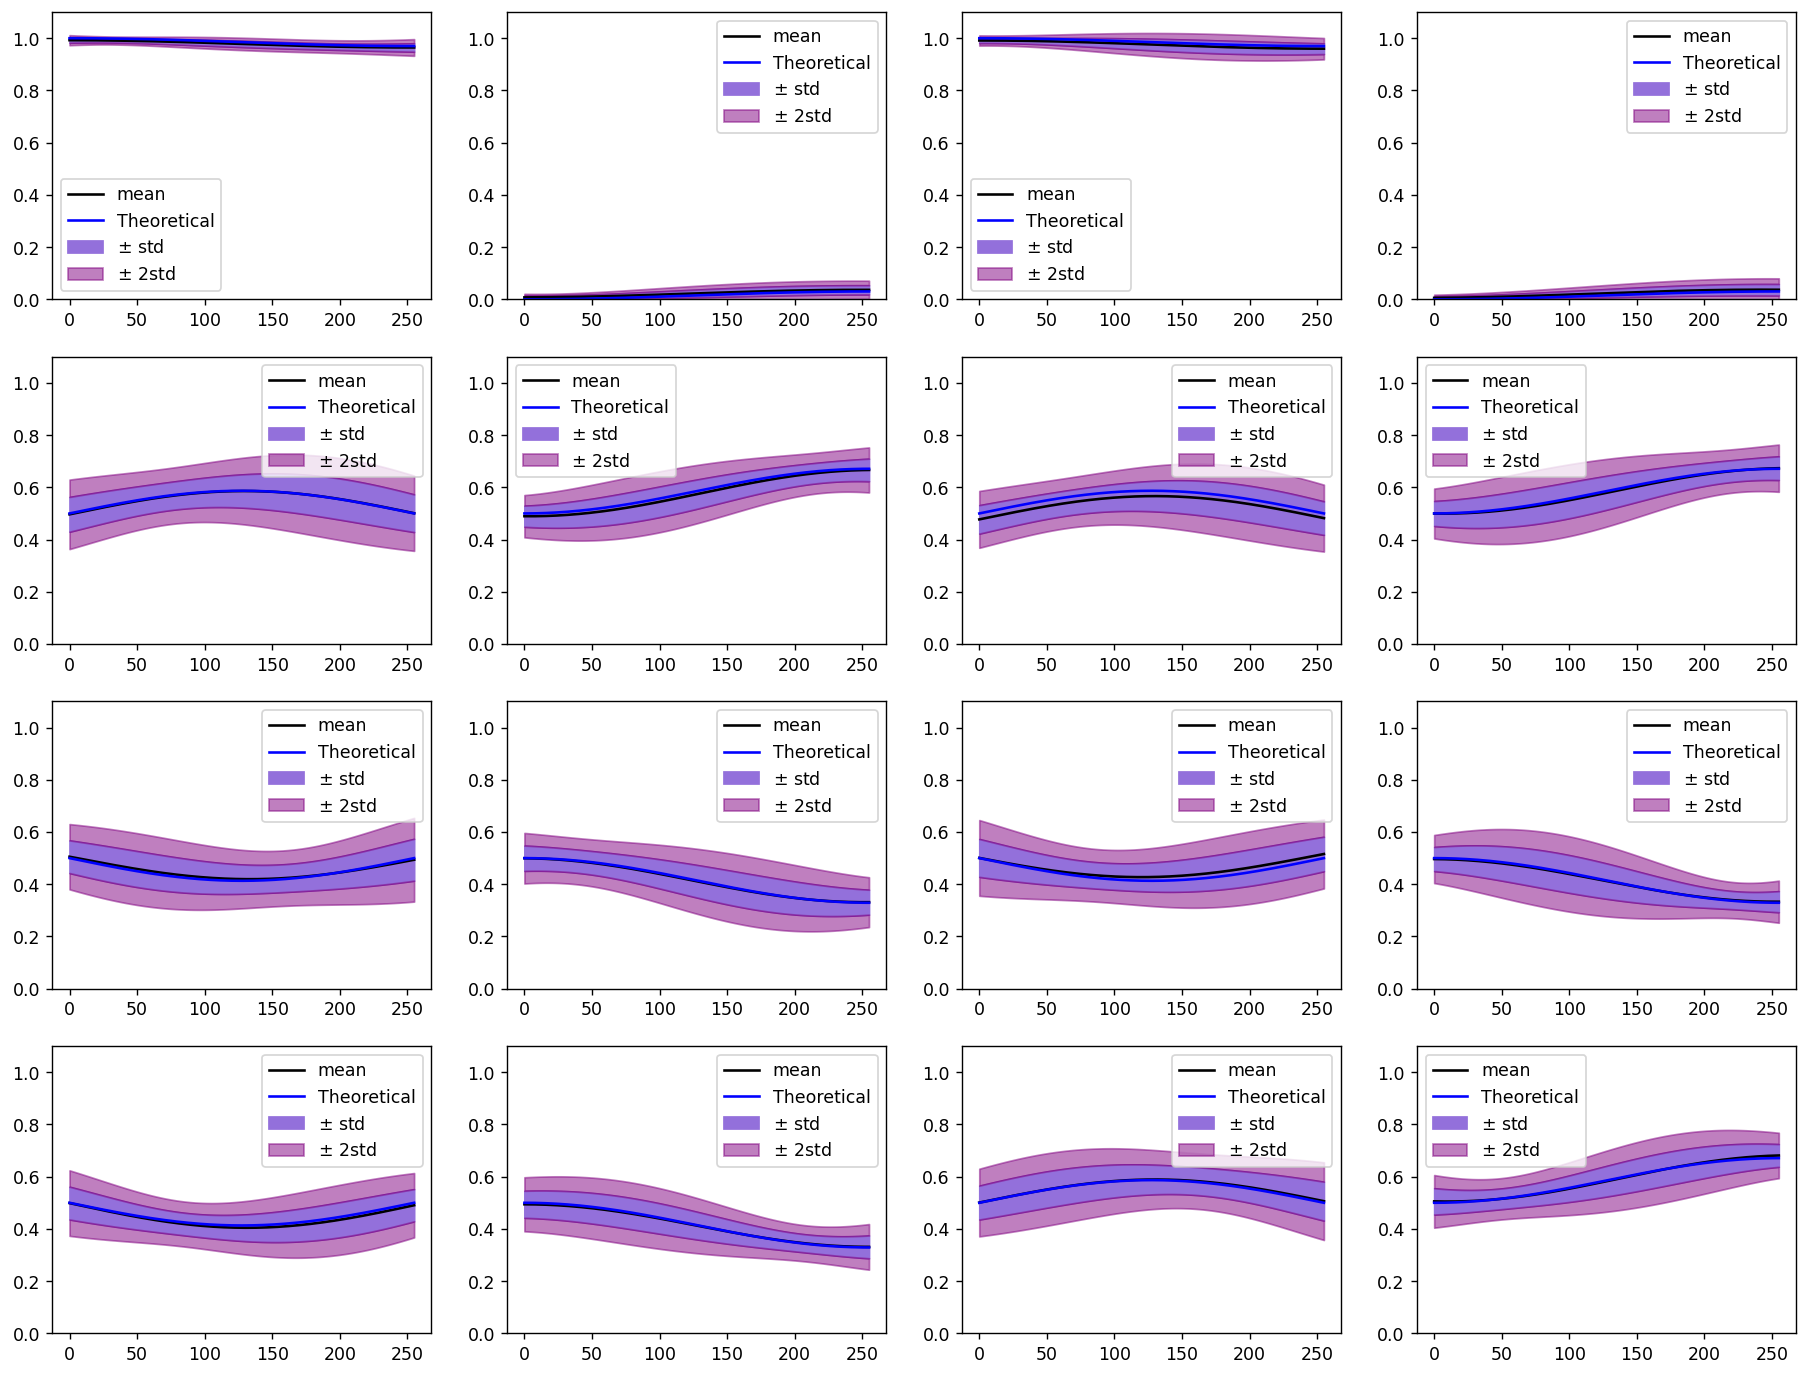

In [154]:
mean,std,I = errors(sigma=2*degrees,steps=50,J=J)

In [155]:
comp = compare_Jones(mean,Jslm_simulation)